# Задача 5. Обучение без учителя

* **Дедлайн**: 14.04.2023, 23:59
* **Основной полный балл**: 5
* **Максимум баллов**: 10

## Задача

- [X] Найти данные с количеством признаков хотя бы 50, на которых можно решить задачу кластеризации.
- [X] Выполнить разведочный анализ (**EDA**). При необходимости выполнить полезные преобразования данных.
- [X] Самостоятельно реализуйте один из алгоритмов кластеризации, например **K-means**.
- [X] Обучите модели кластеризации, используя свою реализацию, а также хотя бы две реализации из **sklearn** (**KMeans**, **Affinity Propogation**, **DBSCAN** и тд).
- [X] При обучении использовать **подбор гиперпараметров**.
- [X] Сравнить качество моделей: замерить скорость обучения, вычислить различные метрики качества.
- [X] (+3 балла) Также снизить размерность данных с помощью метода главных компонент **PCA** и и понять качество дальнейшей кластеризации всеми использованными реализациями при различном количестве главных компонент.
- [X] (+2 балла) Визуализировать данные снижением размерности до 2 или 3 с помощью **PCA** и **t-SNE**. В случае проблем с производительностью **t-SNE**, можно сначала до какой то степени снизить размерность с помощью **PCA**, а затем запустить **t-SNE**.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Датасет

[Fashion MNIST](https://www.kaggle.com/datasets/zalando-research/fashionmnist) $-$ датасет с изображениями (28 х 28) элементов одежды. Для обучения были выбраны 10000 фотографий из тестовой выборки.  

In [4]:
df = pd.read_csv('fashion-mnist_test.csv')

In [13]:
df.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    1
pixel781    1
pixel782    1
pixel783    1
pixel784    1
Length: 785, dtype: int64

In [14]:
df = df.fillna(0)

In [15]:
df.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

# EDA

In [5]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103.0,87.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,0,0,0,0,0,0,...,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0,0,0,0,0,0,14,53,99,...,0.0,0.0,0.0,0.0,63.0,53.0,31.0,0.0,0.0,0.0
3,2,0,0,0,0,0,0,0,0,0,...,137.0,126.0,140.0,0.0,133.0,224.0,222.0,56.0,0.0,0.0
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
X = df.drop(['label'], axis=1)
y = df['label'] 

In [17]:
y.unique()

array([0, 1, 2, 3, 8, 6, 5, 4, 7, 9])

Масштабируем значения пикселей

In [18]:
X = X / 255
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.035294,0.031373,0.000000,...,0.403922,0.341176,0.219608,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.133333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.054902,0.207843,0.388235,0.066667,...,0.000000,0.000000,0.000000,0.0,0.247059,0.207843,0.121569,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.631373,...,0.537255,0.494118,0.549020,0.0,0.521569,0.878431,0.870588,0.219608,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0


# PCA

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

pca.fit(X)
X_pca = pca.transform(X)

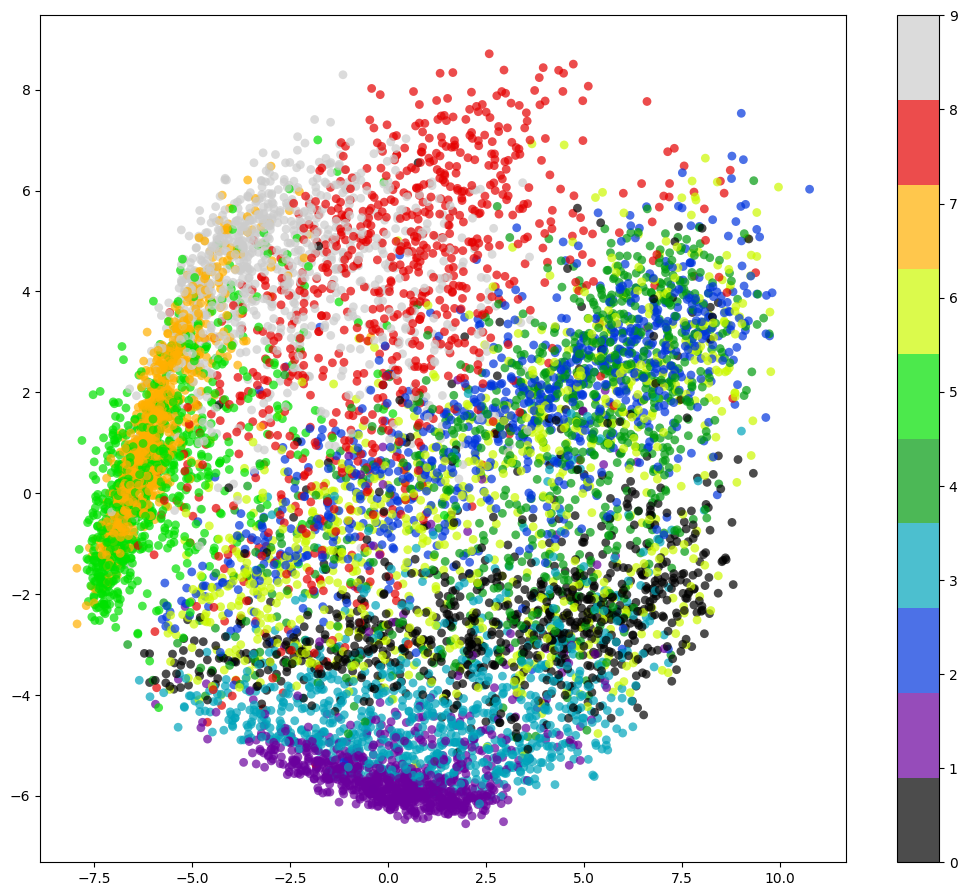

In [26]:
plt.figure(figsize=(13, 11))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y,
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();

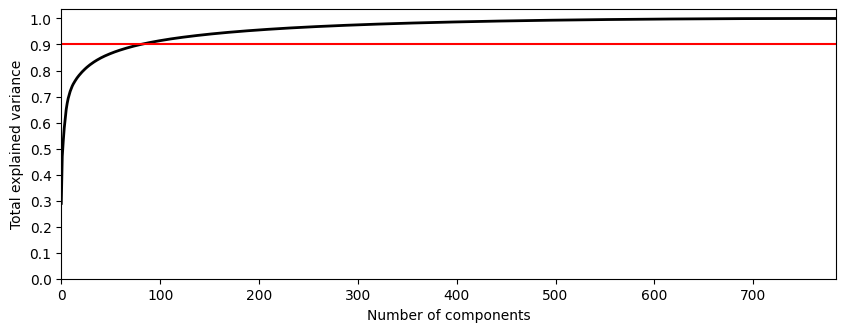

In [30]:
pca = PCA().fit(X)

plt.figure(figsize=(10,3.5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 28 * 28)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axhline(0.9, c='r')

# t-SNE

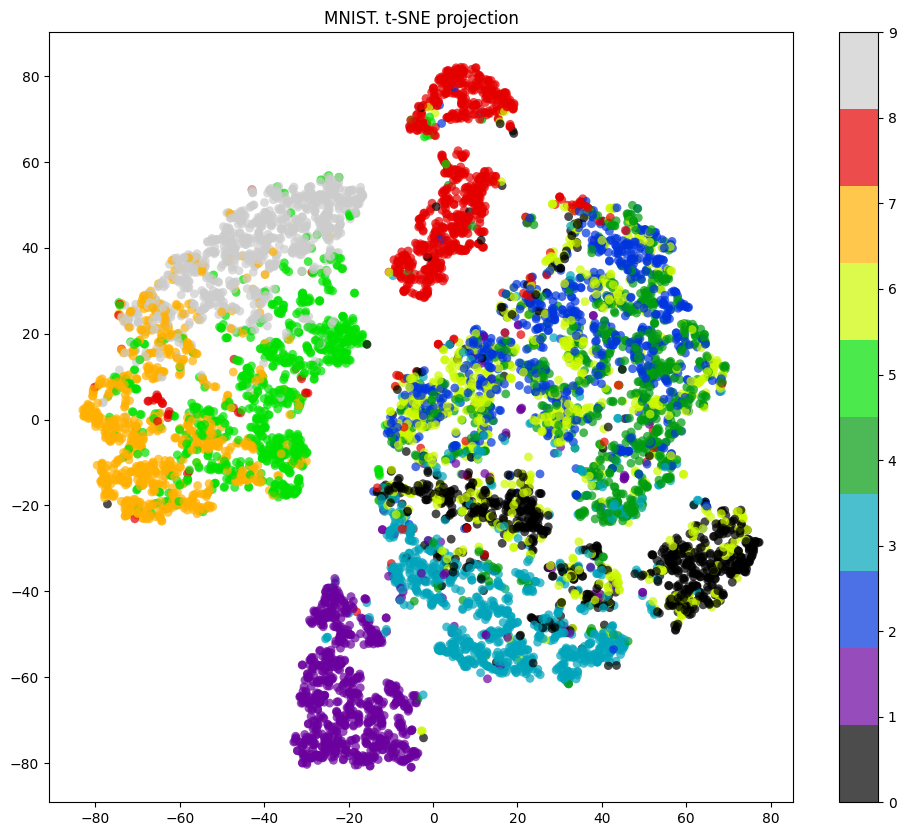

In [28]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=42)

X_tsne = tsne.fit_transform(X_pca)

plt.figure(figsize=(12, 10))
plt.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    c=y,
    edgecolor="none",
    alpha=0.7,
    s=40,
    cmap=plt.cm.get_cmap("nipy_spectral", 10),
)
plt.colorbar()
plt.title("MNIST. t-SNE projection");

# Собственная реализация K-Mean

In [34]:
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.utils import check_array, check_scalar, check_random_state
from sklearn.utils.validation import check_is_fitted

class MyKMeans(BaseEstimator, ClusterMixin):
    def __init__(self, n_clusters=10, *, tol=1e-4, random_state=None):
        self.n_clusters = n_clusters
        self.tol = tol
        self.random_state = random_state

    def predict(self, x):
        check_is_fitted(self)
        return self._get_labels(check_array(x))

    def fit(self, x, y=None):
        self.n_clusters = check_scalar(self.n_clusters, "n_clusters", int, min_val=1)
        self.tol = check_scalar(self.tol, "tol", float, min_val=0)
        self.random_state_ = check_random_state(self.random_state)
        x = check_array(x)

        self.n_features_in_ = x.shape[1]
        self.cluster_centers_ = x[self.random_state_.choice(len(x), size=self.n_clusters, replace=False), :]
        max_center_shift = np.inf

        while max_center_shift > self.tol:
            self.labels_ = self._get_labels(x)

            new = np.empty((self.n_clusters, self.n_features_in_))
            for i in np.unique(self.labels_):
                new[i] = np.mean(x[self.labels_ == i], axis=0)

            max_center_shift = np.max(np.linalg.norm(self.cluster_centers_ - new, axis=1))

            self.cluster_centers_ = new

        return self

    def _get_labels(self, x):
        return np.argmin(
            np.linalg.norm(x[..., None] - self.cluster_centers_.T, axis=1),
            axis=1,
        )

In [36]:
xs = [PCA(n_components=i).fit_transform(X) for i in [30, 80, 200,300]] + [X]

In [37]:
import itertools, time
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, fowlkes_mallows_score
from sklearn.base import clone

def train(est, params):
    params_combs = [
        dict(param) for param in
        itertools.product(*([(name, v) for v in vs] for (name, vs) in params.items()))
    ]

    results = []
    for x in xs:
        best_ari = None
        best_ami = None
        best_fmi = None

        for param in params_combs:
            e = clone(est).set_params(**param)
            start_time = time.perf_counter()
            pred = e.fit_predict(x)
            pred_time = (time.perf_counter() - start_time)

            ari = adjusted_rand_score(y, pred)
            if best_ari is None or ari > best_ari[0]:
                best_ari = ari, pred_time, param

            ami = adjusted_mutual_info_score(y, pred)
            if best_ami is None or ami > best_ami[0]:
                best_ami = ami, pred_time, param

            fmi = fowlkes_mallows_score(y, pred)
            if best_fmi is None or fmi > best_fmi[0]:
                best_fmi = fmi, pred_time, param

        res = {
            "cluster": est.__class__.__name__,
            "dimension": x.shape[1],
            "mean fit predict time, s": np.mean([best_ari[1], best_ami[1], best_fmi[1]]),
            "best ari": best_ari[0],
            "best ami": best_ami[0],
            "best fmi": best_fmi[0]
        }

        print(res)
        results.append(res)

    return results

In [38]:
my_k_mean = train(MyKMeans(n_clusters=10, random_state=123), params={})

{'cluster': 'MyKMeans', 'dimension': 30, 'mean fit predict time, s': 0.5674926650008274, 'best ari': 0.3699311815830417, 'best ami': 0.5267091010054076, 'best fmi': 0.43908463794598607}
{'cluster': 'MyKMeans', 'dimension': 80, 'mean fit predict time, s': 3.089887013000407, 'best ari': 0.32879630299338997, 'best ami': 0.503312675006916, 'best fmi': 0.40054925776323347}
{'cluster': 'MyKMeans', 'dimension': 200, 'mean fit predict time, s': 5.903657098000622, 'best ari': 0.3288750928653494, 'best ami': 0.5034673315990413, 'best fmi': 0.4006336783589582}
{'cluster': 'MyKMeans', 'dimension': 300, 'mean fit predict time, s': 8.707118833001005, 'best ari': 0.3288750928653494, 'best ami': 0.5034673315990413, 'best fmi': 0.4006336783589582}
{'cluster': 'MyKMeans', 'dimension': 784, 'mean fit predict time, s': 23.565478106000228, 'best ari': 0.3289253012669154, 'best ami': 0.503500560343733, 'best fmi': 0.4006724616790287}


In [39]:
from sklearn.cluster import KMeans

k_mean = train(
    KMeans(n_clusters=10, n_init='auto', random_state=0),
    params={"algorithm": ["lloyd", "elkan"]}
)

{'cluster': 'KMeans', 'dimension': 30, 'mean fit predict time, s': 0.4715812469985394, 'best ari': 0.38250237573110213, 'best ami': 0.5208372822255196, 'best fmi': 0.4463758915031494}
{'cluster': 'KMeans', 'dimension': 80, 'mean fit predict time, s': 0.28718938900055946, 'best ari': 0.348292366414279, 'best ami': 0.5184323308623714, 'best fmi': 0.4175449106843836}
{'cluster': 'KMeans', 'dimension': 200, 'mean fit predict time, s': 0.6800744689990097, 'best ari': 0.3740308851626484, 'best ami': 0.523705839662901, 'best fmi': 0.43963297327804457}
{'cluster': 'KMeans', 'dimension': 300, 'mean fit predict time, s': 1.4560391350005375, 'best ari': 0.40585122862733913, 'best ami': 0.5382526186410933, 'best fmi': 0.4679500126072215}
{'cluster': 'KMeans', 'dimension': 784, 'mean fit predict time, s': 0.7784227390002343, 'best ari': 0.37742025225927633, 'best ami': 0.5045462525754768, 'best fmi': 0.4418794364590547}


In [40]:
from sklearn.cluster import DBSCAN

dbscan = train(
    DBSCAN(n_jobs=4),
    params={
        "eps": [500, 600, 700],
        "min_samples": [40, 80, 120]
    }
)

{'cluster': 'DBSCAN', 'dimension': 30, 'mean fit predict time, s': 6.8021997599989845, 'best ari': 0.0, 'best ami': 0.0, 'best fmi': 0.3161132889936649}
{'cluster': 'DBSCAN', 'dimension': 80, 'mean fit predict time, s': 2.2223450989986304, 'best ari': 0.0, 'best ami': 0.0, 'best fmi': 0.3161132889936649}
{'cluster': 'DBSCAN', 'dimension': 200, 'mean fit predict time, s': 2.8302498670000205, 'best ari': 0.0, 'best ami': 0.0, 'best fmi': 0.3161132889936649}
{'cluster': 'DBSCAN', 'dimension': 300, 'mean fit predict time, s': 4.036630176999097, 'best ari': 0.0, 'best ami': 0.0, 'best fmi': 0.3161132889936649}
{'cluster': 'DBSCAN', 'dimension': 784, 'mean fit predict time, s': 5.605517269001211, 'best ari': 0.0, 'best ami': 0.0, 'best fmi': 0.3161132889936649}


In [43]:
results = pd.DataFrame(my_k_mean + k_mean + dbscan)

# Результаты

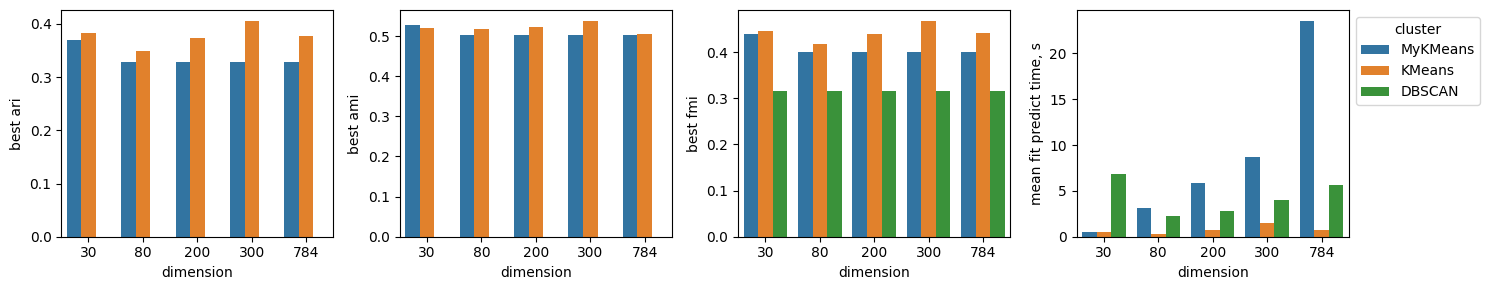

In [47]:
import seaborn as sns

fig, axs = plt.subplots(ncols=4, figsize=(15, 3))

for metric, ax in zip(["best ari", "best ami", "best fmi", "mean fit predict time, s"], axs.flatten()):
    sns.barplot(results, x="dimension", y=metric, hue="cluster", ax=ax)
    if metric == "mean fit predict time, s":
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    else:
        ax.get_legend().remove()

fig.tight_layout()

1. Уменьшение размерности данных почти не сказалось на качестве предсказаний. 
2. Самой быстрообучающейся моделью оказалась KMean библиотеки sklearn
3. На данных fashion mnist хуже всего себя показала модель DBSCAN